In [25]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

In [2]:
x = T.vector('x')
def square(x):
    return x*x

In [4]:
outputs, updates = theano.scan(
        fn = square,
        sequences = x,
        n_steps = x.shape[0]
)

In [6]:
square_op = theano.function(
   inputs = [x],
   outputs = [outputs]
)

In [10]:
o_val = square_op(np.array([1,2,3,4,5]))

In [12]:
print("output:", o_val)

('output:', [array([  1.,   4.,   9.,  16.,  25.])])


In [15]:
#calculate Fibonacci

N = T.iscalar('N')

In [16]:
def recurrence(n, fn_1, fn_2):
    return fn_1 + fn_2, fn_1

In [17]:
outputs, updates = theano.scan(
      fn=recurrence,
      sequences=T.arange(N),
      n_steps=N,
      outputs_info = [1., 1.]
)

In [18]:
fibonacci = theano.function(
     inputs = [N],
     outputs = outputs)

In [19]:
o_val = fibonacci(8)

In [20]:
print("Output:", o_val)

('Output:', [array([  2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.], dtype=float32), array([  1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.], dtype=float32)])


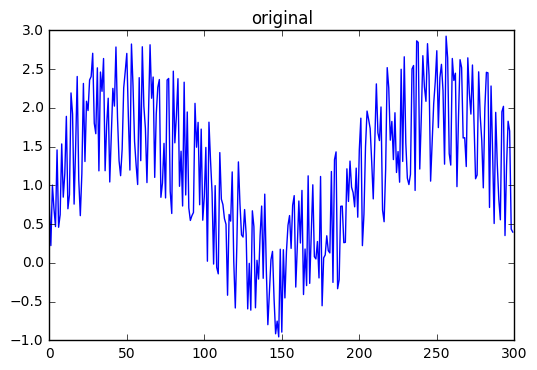

In [26]:
X = 2*np.random.rand(300) + np.sin(np.linspace(0, 3*np.pi, 300))
plt.plot(X)
plt.title('original')
plt.show()

In [33]:
decay = T.scalar('decay')
sequence = T.vector('sequence')

In [34]:
def recurrence(x, last, decay):
    return (1-decay)*x + decay*last

In [38]:
outputs, _ = theano.scan(
      fn=recurrence,
      sequences=sequence,
      n_steps=sequence.shape[0],
      outputs_info=[np.float64(0)],
      non_sequences=[decay])

In [39]:
lpf = theano.function(
      inputs = [sequence, decay],
      outputs = outputs)

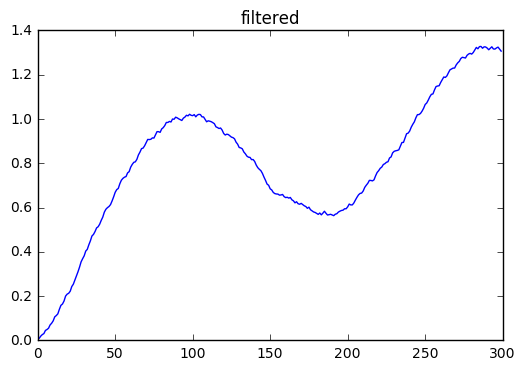

In [41]:
Y = lpf(X, 0.99)
plt.plot(Y)
plt.title('filtered')
plt.show()